**Download and classification of the Impact Assessment reports**

**Step 1. Merge tables in excel file**

In [2]:
import pandas as pd
import os

# Define the directory containing the Excel files
input_directory = 'Dataset'  # Replace with your directory path
output_file = 'labour_reports_dataset.xlsx'  # Name of the output file

# List to store all dataframes
dataframes = []

# Loop through all Excel files in the directory
for filename in os.listdir(input_directory):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_directory, filename)

        # Read the Excel file into a dataframe
        df = pd.read_excel(file_path)

        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes in the list
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the merged dataframe to a new Excel file
merged_df.to_excel(output_file, index=False)

print(f"All tables have been merged and saved into {output_file}.")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

All tables have been merged and saved into labour_reports_dataset.xlsx.


**Step 2. Check the content of the excel file**

In [ ]:
import pandas as pd

# Define the path to the Excel file
file_path = "Dataset/labour_reports_dataset_v2.xlsx"  # Replace with the correct file path

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to verify the data
print(df.head())

In [ ]:
pip install tqdm

**Step 3. Code to clean a specific folder**

In [25]:
import os
import shutil

# Define the directory to be cleared
download_directory = "extracted_sections"  # Replace with the correct path if necessary

# Check if the directory exists
if os.path.exists(download_directory):
    # Delete all files and subdirectories within the directory
    for filename in os.listdir(download_directory):
        file_path = os.path.join(download_directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)  # Remove file or symbolic link
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)  # Remove directory and its contents
        except Exception as e:
            print(f"Failed to delete {file_path}: {e}")
else:
    print(f"Directory {download_directory} does not exist.")

print("All files in the directory have been deleted.")

All files in the directory have been deleted.


**Step 4. Assign code to each entry**

In [5]:
import pandas as pd
import os
import random
import string

# Define the directory containing the Excel files
input_directory = 'Dataset'  # Replace with your directory path
output_file = 'labour_reports_dataset_v2.xlsx'  # Name of the output file

# Function to generate a random alphanumeric code of 5 characters
def generate_code():
    return ''.join(random.choices(string.ascii_uppercase + string.digits, k=5))

# List to store all dataframes
dataframes = []

# Loop through all Excel files in the directory
for filename in os.listdir(input_directory):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(input_directory, filename)

        # Read the Excel file into a dataframe
        df = pd.read_excel(file_path)

        # Generate a unique code for each entry and add it as the first column
        df.insert(0, 'Code', [generate_code() for _ in range(len(df))])

        # Append the dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes in the list
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the merged dataframe to a new Excel file
merged_df.to_excel(output_file, index=False)

print(f"All tables have been merged, unique codes assigned, and saved into {output_file}.")

All tables have been merged, unique codes assigned, and saved into labour_reports_dataset_v2.xlsx.


**(Optional) Download in bulk files from links in the dataset**

In [ ]:
import pandas as pd
import requests
import os
from tqdm import tqdm

# Define the path to the Excel file
file_path = "Dataset/labour_reports_dataset_v2.xlsx"  # Replace with your actual file path

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Define the directory where files will be downloaded
download_directory = "Dataset/downloads"  # You can specify your preferred directory

# Create the directory if it doesn't exist
if not os.path.exists(download_directory):
    os.makedirs(download_directory)

# Iterate over the rows in the DataFrame and download files
for index, row in df.iterrows():
    url = row['Link to the document (PDF, DOC, etc.)']  # Replace with the correct column name if different
    title = row['Code']  # Use the 'Code' column to name the file

    # Check if the URL and title are valid
    if pd.notnull(url) and pd.notnull(title):
        try:
            # Clean the title to be a valid filename
            file_name = f"{title}.pdf".replace('/', '-').replace('\\', '-').replace(':', '-')
            file_path = os.path.join(download_directory, file_name)

            # Send a GET request with a timeout to download the file
            response = requests.get(url, timeout=10, stream=True)

            # Check if the response status is OK (200)
            if response.status_code == 200:
                # Get the total file size in bytes
                total_size = int(response.headers.get('content-length', 0))

                # Download the file with a progress bar
                with open(file_path, 'wb') as file, tqdm(
                    desc=file_name,
                    total=total_size,
                    unit='B',
                    unit_scale=True,
                    unit_divisor=1024,
                    ncols=80,
                    bar_format='{l_bar}{bar} | {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}{postfix}]'
                ) as bar:
                    for chunk in response.iter_content(chunk_size=1024):
                        if chunk:
                            file.write(chunk)
                            bar.update(len(chunk))
                print(f"Downloaded and saved as: {file_path}")
            else:
                print(f"Failed to download {url}: Status code {response.status_code}")

        except requests.exceptions.Timeout:
            print(f"Timeout occurred while downloading {url}")
        except Exception as e:
            print(f"Failed to download {url}: {e}")

print("Download complete!")

**(Optional) Download only selected reports based on Author**

In [ ]:
import pandas as pd
import requests
import os
from tqdm import tqdm

# Define the path to the Excel file
file_path = "Dataset/labour_reports_dataset_v2.xlsx"  # Replace with your actual file path

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Filter the DataFrame to include only rows where 'Eurofound' is the first corporate author
filtered_df = df[df['Corporate authors'].str.split(',').str[0].str.contains('Eurofound', na=False)]

# Define the directory where files will be downloaded
download_directory = "Dataset/downloads"  # You can specify your preferred directory

# Create the directory if it doesn't exist
if not os.path.exists(download_directory):
    os.makedirs(download_directory)

# Iterate over the rows in the filtered DataFrame and download files
for index, row in filtered_df.iterrows():
    url = row['Link to the document (PDF, DOC, etc.)']  # Replace with the correct column name if different
    title = row['Code']  # Use the 'Code' column to name the file

    # Check if the URL and title are valid
    if pd.notnull(url) and pd.notnull(title):
        try:
            # Clean the title to be a valid filename
            file_name = f"{title[:50].strip()}.pdf".replace('/', '-').replace('\\', '-').replace(':', '-')
            file_path = os.path.join(download_directory, file_name)

            # Send a GET request with a timeout to download the file
            response = requests.get(url, timeout=10, stream=True)

            # Check if the response status is OK (200)
            if response.status_code == 200:
                # Get the total file size in bytes
                total_size = int(response.headers.get('content-length', 0))

                # Download the file with a progress bar
                with open(file_path, 'wb') as file, tqdm(
                    desc=file_name,
                    total=total_size,
                    unit='B',
                    unit_scale=True,
                    unit_divisor=1024,
                    ncols=80,
                    bar_format='{l_bar}{bar} | {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}{postfix}]'
                ) as bar:
                    for chunk in response.iter_content(chunk_size=1024):
                        if chunk:
                            file.write(chunk)
                            bar.update(len(chunk))
                print(f"Downloaded and saved as: {file_path}")
            else:
                print(f"Failed to download {url}: Status code {response.status_code}")

        except requests.exceptions.Timeout:
            print(f"Timeout occurred while downloading {url}")
        except Exception as e:
            print(f"Failed to download {url}: {e}")

print("Download complete!")

**(Optional) Count files in a folder**

In [20]:
import os

def count_files_in_folder(folder_path):
    # Count the number of files in the folder
    file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return file_count

# Example usage
folder_path = 'Dataset/downloads'  # Change this to the path of your folder

# Get the count of files
file_count = count_files_in_folder(folder_path)
print(f"Number of files in the folder '{folder_path}': {file_count}")

Number of files in the folder 'Dataset/downloads': 40


**(Optional) Zip files from a specific folder with a specific extension**

In [ ]:
import os
import zipfile

def zip_txt_files(folder_path, zip_filename):
    # Create a ZIP file with the given filename
    with zipfile.ZipFile(zip_filename, 'w') as zipf:
        # Iterate through all files in the specified folder
        for filename in os.listdir(folder_path):
            # Check if the file has a .txt extension
            if filename.endswith('.pdf'):
                # Full path of the file to be added to the ZIP
                file_path = os.path.join(folder_path, filename)

                # Add the file to the ZIP file
                zipf.write(file_path, os.path.basename(file_path))
                print(f"Added: '{filename}' to the ZIP file.")

# Example usage
folder_path = 'Dataset/downloads'  # Path to the folder containing the .txt files
zip_filename = 'Eurofound_reports.zip'  # Name of the output ZIP file

# Run the function to zip all .txt files in the folder
zip_txt_files(folder_path, zip_filename)

**Step 5. Binary variables for report subjects and Member States**

In [12]:
import pandas as pd

# Load the Excel file
file_path = 'Dataset/labour_reports_dataset_v2.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Define the categories and corresponding subjects
categories = {
    "Labour & Employment": ["labour", "employment", "job", "unemployment", "labour mobility", "platform work"],
    "Health & Well-being": ["health", "disease", "mental health", "well-being", "occupational", "safety", "pandemic", "social protection"],
    "Social Policy & Inclusion": ["social", "social policy", "social inclusion", "social exclusion", "social protection", "poverty", "solidarity", "inclusion", "crime", "child protection", "family", "diversity", "integration"],
    "Education & Skills": ["education", "training", "qualifications", "vocational", "digital skills", "competence"],
    "Digital & Technology": ["digital", "digitisation", "digital skills", "innovation", "technology", "digital economy"],
    "Economic Policy": ["economic", "GDP", "economic growth", "economy", "funding policy", "tax", "taxation", "regulation", "competitiveness", "entrepreneurship", "small businesses", "SME"],
    "Labour Market Conditions": ["working", "conditions", "labour market", "working conditions", "employment conditions"],
    "Security & Safety": ["security", "risk", "safety", "crime", "occupational safety"],
    "Governance & Democracy": ["democracy", "rights", "law", "public", "regulation", "governance"],
    "Migration & Mobility": ["migration", "mobility", "mobility programme"],
    "Environment & Sustainability": ["climate change", "environmental policy", "energy", "sustainability"],
    "Pensions & Social Security": ["pension", "social security", "income", "elderly", "State aid", "debt"],
    "Labour Market Policies": ["labour policy", "employment policy", "labour regulation", "labour standards"],
    "Economic Development": ["economic development", "economic growth", "funding", "infrastructure"],
    "Welfare & Social Services": ["social services", "welfare", "public services", "social infrastructure"],
    "Innovation & Research": ["research", "innovation", "innovation policy", "science", "technology"],
    "Youth & Education Programmes": ["youth", "youth policy", "education policy", "education programme"],
    "Professional Skills & Training": ["professional", "skills development", "training", "qualifications"],
    "Economic Integration": ["European integration", "economic integration", "social integration"],
    "Business & Trade": ["trade", "market", "entrepreneurship", "business policy", "economic policy"],
    "Financial Policies": ["finance", "financial policy", "budget", "public finance"],
    "Housing & Urban Development": ["housing", "urban policy", "urban development", "housing policy"],
    "Human Rights & Legal Issues": ["human rights", "legal issues", "discrimination", "equality"],
    "Culture & Society": ["culture", "cultural policy", "social attitudes", "community development"],
    "Employment Programmes": ["employment programme", "job creation", "employment services", "job market"]
}

# List of EU Member States for binary encoding
member_states = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy",
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal",
    "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]

# Create binary columns for each category
for category, subjects in categories.items():
    df[category] = df['Subjects'].apply(lambda x: 1 if any(subject in str(x) for subject in subjects) else 0)

# Create binary columns for each Member State
for state in member_states:
    df[state] = df['Subjects'].apply(lambda x: 1 if state in str(x) else 0)

# Save the updated DataFrame with categories and member states to a new Excel file
output_file_categorised_with_states = 'labour_reports_with_categories_and_states.xlsx'  # Specify your desired output path
df.to_excel(output_file_categorised_with_states, index=False)

print(f"The updated file with categories and member states has been saved as {output_file_categorised_with_states}.")

The updated file with categories and member states has been saved as labour_reports_with_categories_and_states.xlsx.


**Step 6. Dataset topics analysis**

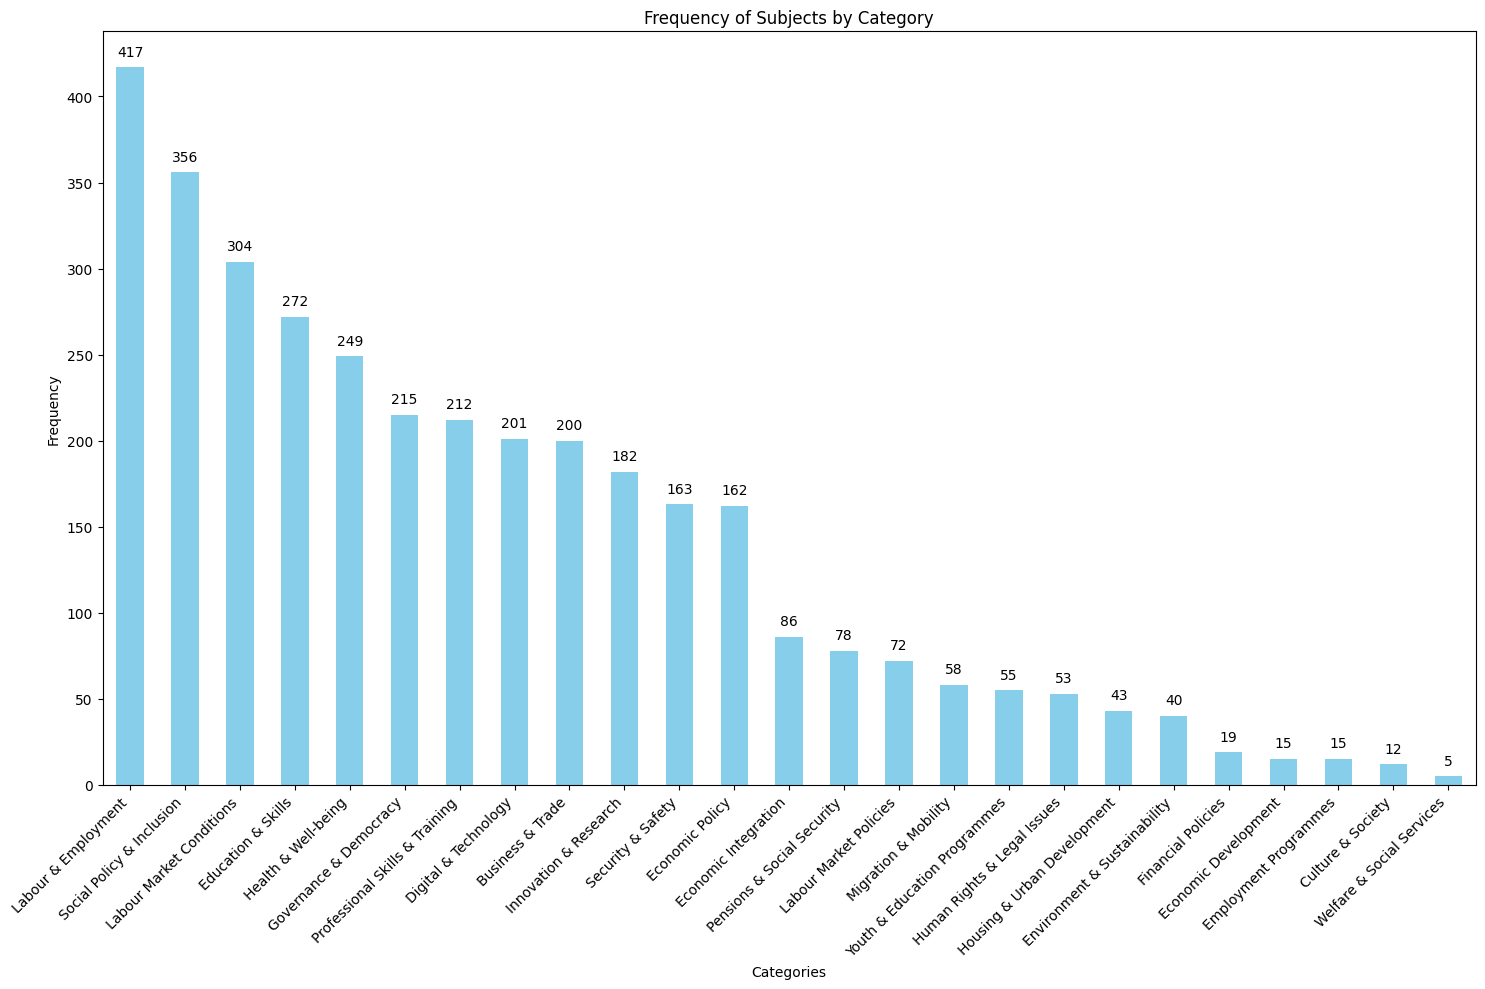

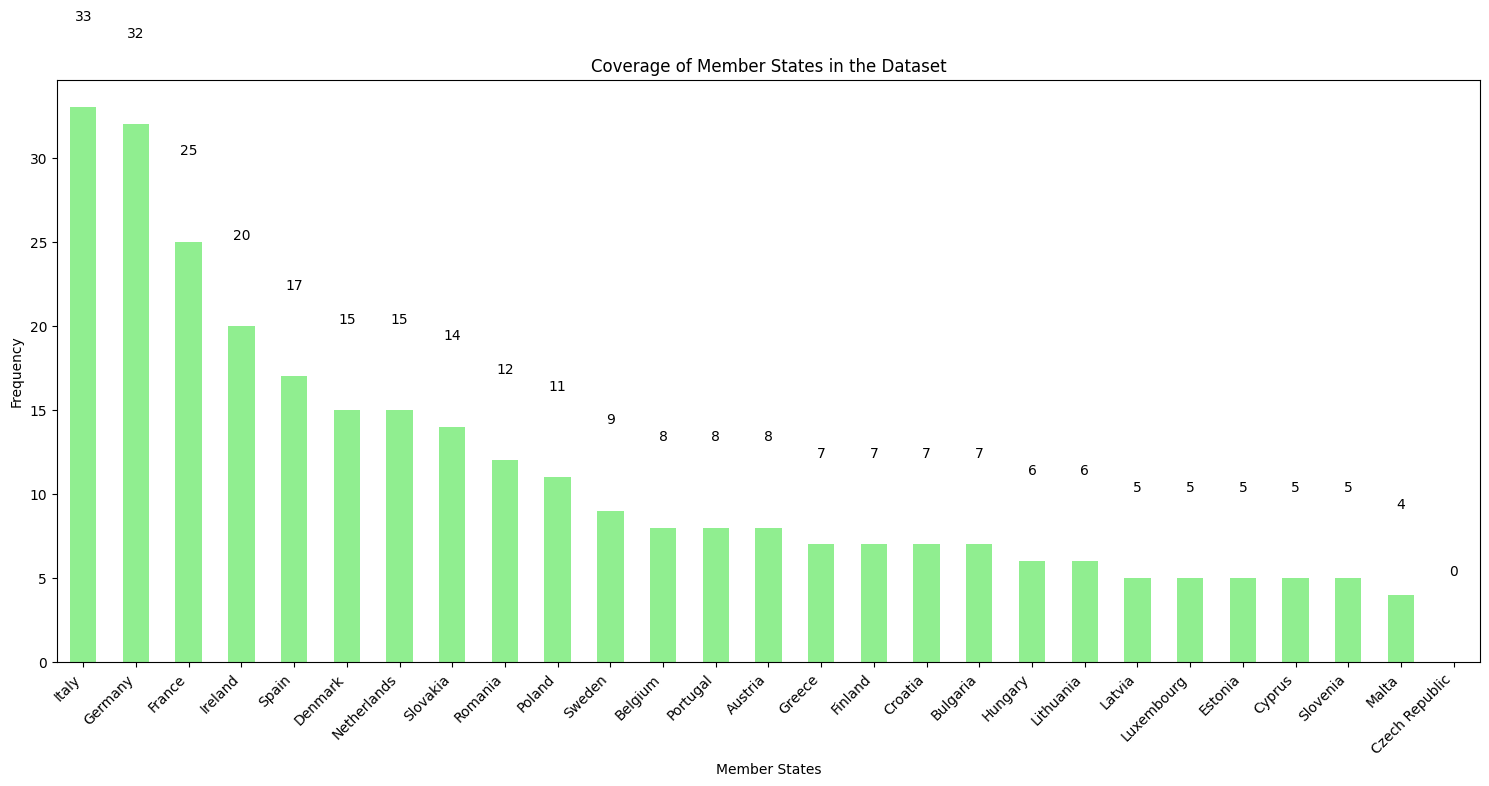

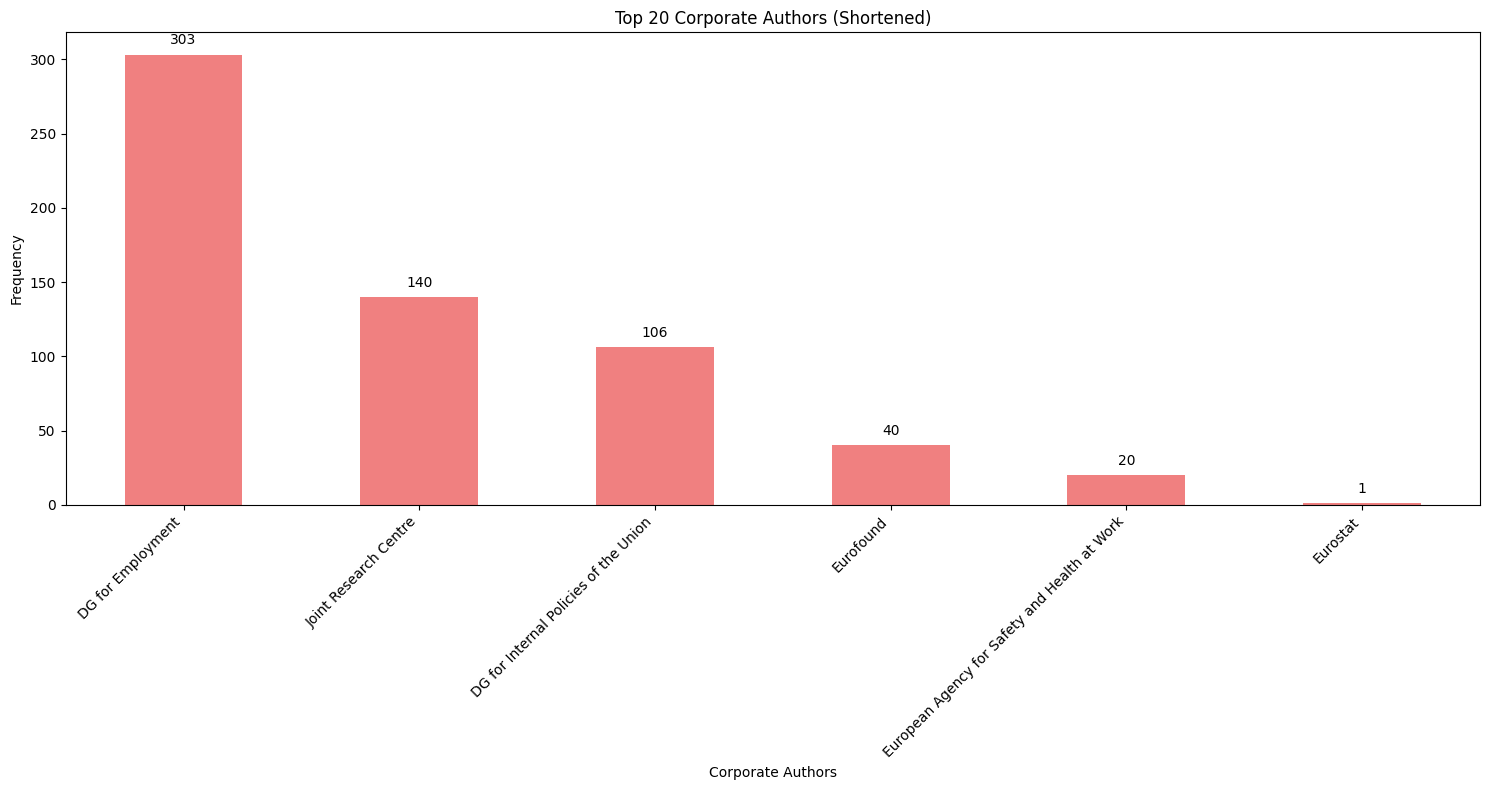

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file with the categorised data
file_path = 'labour_reports_with_categories_and_states.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# List of EU Member States for binary encoding
member_states = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy",
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal",
    "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"
]

# Define the categories for representation
categories = [
    "Labour & Employment", "Health & Well-being", "Social Policy & Inclusion",
    "Education & Skills", "Digital & Technology", "Economic Policy",
    "Labour Market Conditions", "Security & Safety", "Governance & Democracy",
    "Migration & Mobility", "Environment & Sustainability", "Pensions & Social Security",
    "Labour Market Policies", "Economic Development", "Welfare & Social Services",
    "Innovation & Research", "Youth & Education Programmes",
    "Professional Skills & Training", "Economic Integration", "Business & Trade",
    "Financial Policies", "Housing & Urban Development", "Human Rights & Legal Issues",
    "Culture & Society", "Employment Programmes"
]

# Extract the first corporate author and replace "Directorate-General" with "DG"
df['First Corporate Author'] = df['Corporate authors'].str.split(',').str[0].str.replace('Directorate-General', 'DG')

# Function to add value labels to bars
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart."""
    for rect in ax.patches:
        # Get the height of each bar
        height = rect.get_height()
        # Adding a label just above the bar
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + spacing, f'{int(height)}',
            ha='center', va='bottom'
        )

# Plotting the frequency of subjects by category
plt.figure(figsize=(15, 10))
category_counts = df[categories].sum().sort_values(ascending=False)
ax1 = category_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Subjects by Category')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
add_value_labels(ax1)
plt.tight_layout()
plt.show()

# Plotting the coverage of Member States
plt.figure(figsize=(15, 8))
state_counts = df[member_states].sum().sort_values(ascending=False)
ax2 = state_counts.plot(kind='bar', color='lightgreen')
plt.title('Coverage of Member States in the Dataset')
plt.xlabel('Member States')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
add_value_labels(ax2)
plt.tight_layout()
plt.show()

# Plotting the frequency of the first "Corporate authors" (shortened)
plt.figure(figsize=(15, 8))
# Count the occurrences of each shortened corporate author
corporate_authors_counts = df['First Corporate Author'].value_counts().head(20)  # Top 20 for clarity
ax3 = corporate_authors_counts.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Corporate Authors (Shortened)')
plt.xlabel('Corporate Authors')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
add_value_labels(ax3)
plt.tight_layout()
plt.show()

```
**TOPICS COVERED BY EURFOUND REPORTS**
1.	Representativeness of the European social partners: These studies aim to identify and assess the representativeness of various European social partners in different sectors, such as audiovisual industry, culture industry, and energy market.
2.	Working conditions in sectors: Analysis of how megatrends like digitalisation and globalisation affect working conditions across sectors.
3.	Industrial relations landscape in Europe: Comparison of industrial relations structures and practices in central governments across Europe.
4.	Social partners going digital: Examining the use of digital tools in social dialogue and its impact on the world of work.
5.	Business not as usual: Investigating how EU companies adapt to disruptions such as COVID-19 and automation.
6.	Monitoring convergence in the European Union: Analysis of convergence in living and working conditions across EU Member States.
7.	Long-term care workforce: A study on the employment and working conditions of the long-term care sector.
8.	COVID-19 pandemic and the gender divide at work: The impact of the pandemic on gender inequalities in the workplace.
9.	Recovery from COVID-19: The changing structure of European labour markets post-pandemic.
10.	Telework in the EU: Analysis of regulatory frameworks and practices related to telework.
11.	The digital age: Implications of automation and digital transformation on employment and working conditions.
12.	Social dialogue and collective bargaining in the context of COVID-19: The role of social dialogue in managing the crisis.
```

**Converting PDF into TXT**

**Step 1. Install PyPDF2**

In [23]:
pip install PyPDF2 tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00


**(Optional) Convert only table of contents, list of tables and list of figures and introduction or executive summary**

In [24]:
import PyPDF2
import re
import os

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page_num in range(len(reader.pages)):
            text += reader.pages[page_num].extract_text()
    return text

# Function to extract specific sections
def extract_sections(text):
    sections = {
        "contents": None,
        "list_of_tables": None,
        "list_of_figures": None,
        "index": None,
        "summary_of_figures": None,
        "introduction": None,
        "executive_summary": None
    }

    # Define patterns for different sections
    patterns = {
        "contents": r"(Table of Contents|Contents)\s*.*",
        "list_of_tables": r"(List of Tables|Tables)\s*.*",
        "list_of_figures": r"(List of Figures|Figures)\s*.*",
        "index": r"(Index)\s*.*",
        "summary_of_figures": r"(Summary of Figures|List of Figures)\s*.*",
        "introduction": r"(Introduction)\s*.*",
        "executive_summary": r"(Executive Summary)\s*.*"
    }

    # Find and extract sections using patterns
    for section, pattern in patterns.items():
        match = re.search(pattern, text, re.IGNORECASE | re.DOTALL)
        if match:
            start = match.start()
            end = text.find("\n", start + len(match.group()))  # Find end of the section
            sections[section] = text[start:end].strip()

    # Extract text between "Introduction" and the first chapter
    intro_match = re.search(r"(Introduction)\s*.*", text, re.IGNORECASE | re.DOTALL)
    chapter_match = re.search(r"\n1\.\s.*", text, re.IGNORECASE | re.DOTALL)
    if intro_match and chapter_match:
        intro_start = intro_match.start()
        chapter_start = chapter_match.start()
        sections["introduction"] = text[intro_start:chapter_start].strip()

    return sections

# Function to save sections to txt files
def save_sections_to_files(sections, output_directory):
    for section, content in sections.items():
        if content:
            file_path = os.path.join(output_directory, f"{section}.txt")
            with open(file_path, 'w', encoding='utf-8') as file:
                file.write(content)
                print(f"Saved {section} to {file_path}")

# Path to the PDF file
pdf_path = "Dataset/downloads/09NL5.pdf"  # Replace with your PDF file path

# Directory to save extracted sections
output_directory = "extracted_sections"  # Specify your desired directory

# Create directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Extract text from PDF
pdf_text = extract_text_from_pdf(pdf_path)

# Extract specific sections
sections_extracted = extract_sections(pdf_text)

# Save extracted sections to text files
save_sections_to_files(sections_extracted, output_directory)

print("Extraction and saving complete!")

Saved contents to extracted_sections/contents.txt
Saved list_of_tables to extracted_sections/list_of_tables.txt
Saved list_of_figures to extracted_sections/list_of_figures.txt
Saved index to extracted_sections/index.txt
Saved introduction to extracted_sections/introduction.txt
Saved executive_summary to extracted_sections/executive_summary.txt
Extraction and saving complete!


**(Optional) Covert the whole document in TXT**

In [ ]:
import os
import PyPDF2
from tqdm import tqdm

def extract_text_from_pdf(pdf_path):
    """
    Extracts text from a PDF file.

    Args:
        pdf_path (str): Path to the PDF file.

    Returns:
        str: Extracted text from the PDF.
    """
    text = ''
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            page_text = page.extract_text()
            if page_text:
                text += page_text
    return text

def convert_pdfs_to_txt(pdf_directory):
    """
    Converts all PDF files in the specified directory to TXT files
    with the same name as the PDFs.

    Args:
        pdf_directory (str): Path to the directory containing PDF files.
    """
    # Get the list of all PDF files in the directory
    pdf_files = [f for f in os.listdir(pdf_directory) if f.endswith('.pdf')]

    # Create a progress bar using tqdm
    for pdf_file in tqdm(pdf_files, desc="Converting PDFs to TXT"):
        pdf_path = os.path.join(pdf_directory, pdf_file)

        # Extract text from the PDF
        extracted_text = extract_text_from_pdf(pdf_path)

        # Define the TXT file path
        txt_file_name = os.path.splitext(pdf_file)[0] + '.txt'
        txt_file_path = os.path.join(pdf_directory, txt_file_name)

        # Save the extracted text to the TXT file
        with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
            txt_file.write(extracted_text)

def main():
    # Get directory containing PDF files
    pdf_directory = input("Enter the path to the directory containing PDF files: ")

    # Check if the directory exists
    if not os.path.exists(pdf_directory):
        print(f"The directory '{pdf_directory}' does not exist.")
        return

    # Convert PDFs to TXT files
    convert_pdfs_to_txt(pdf_directory)
    print("Conversion completed.")

if __name__ == "__main__":
    main()

Converting PDFs to TXT:  99%|█████████▊| 150/152 [50:15<01:44, 52.41s/it]